<a href="https://colab.research.google.com/github/nprimavera/Laser-Cutting/blob/main/FINAL_FINAL_LASER_CUTTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the desired height of your box to the nearest whole inch (maximum 5 inches): 3
Enter the desired width of your box to the nearest whole inch (maximum 5 inches): 3
Enter the desired length of your box to the nearest whole inch (maximum 5 inches): 3


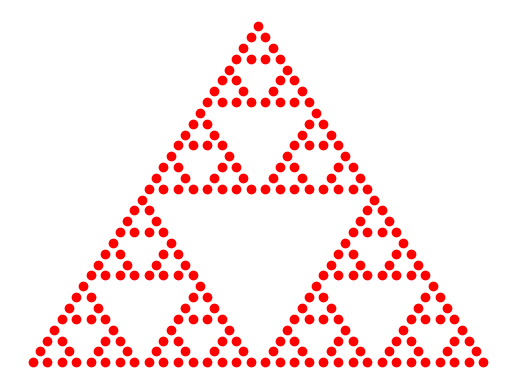

In [56]:
import matplotlib.pyplot as plt
import numpy as np

class Vector:                     # REMINDER: class --> defines the attributes and bahaviors of the vector
    def __init__(self, x, y):     # REMINDER: init function --> special method in a class that is called when an object is created - initializes object's attributes
        self.x = x                # instance variable for x
        self.y = y                # instance variable for y

class AffineTransform:
    def __init__(self, a, b, c, d, e, f):   # initializes object's attributes
        self.a = a    # instance variables
        self.b = b
        self.c = c
        self.d = d
        self.e = e
        self.f = f

def recursivePlot(vector, transforms, num_transforms, current_depth, max_depth, ax):  # recursive plot function w/ specified params
    if current_depth == max_depth:          # base case: current recursion depth equals maximum recursion depth
        ax.plot(vector.x, vector.y, 'ro')   # if true --> recursivePlot will plot the Vector with a call to ax.plot and return
        return

# apply affine transformations to the vector
    for transform in transforms:            # loops through all the transformations in the array
        new_x = transform.a * vector.x + transform.b * vector.y + transform.e
        new_y = transform.c * vector.x + transform.d * vector.y + transform.f
        new_vector = Vector(new_x, new_y)   # calculates a new vector for each transformation
        recursivePlot(new_vector, transforms, num_transforms, current_depth + 1, max_depth, ax)

def defineFractal(startPoint, transforms, max_depth):   # draws the fractal w/ specified params
    fig, ax = plt.subplots()                          # ax plot allows the function to plot on the same set of axes throughout its recursive calls
    num_transforms = len(transforms)                  # the number of transforms is equal to the amount/length of transforms - defined in usage
    recursivePlot(startPoint, transforms, num_transforms, 0, max_depth, ax)
    ax.axis('off')
    plt.savefig('fractal.svg', format='svg')          # saves the fractal as an svg file

# Define box variables based off user input
while True:   # user input for height - max = 5in
    try:
        box_height_inches = int(input("Enter the desired height of your box to the nearest whole inch (maximum 5 inches): "))
        if 1 <= box_height_inches <= 5:
            box_height = box_height_inches * 90
            break
        else:
            print("Error: Box height must be between 1 and 5 inches.")
    except ValueError:
        print("Error: Invalid input. Please enter a valid numerical value for the height.")

while True:   # user input for width - max =5in
    try:
        box_width_inches = int(input("Enter the desired width of your box to the nearest whole inch (maximum 5 inches): "))
        if 1 <= box_width_inches <= 5:
            box_width = box_width_inches * 90
            break
        else:
            print("Error: Box width must be between 1 and 5 inches.")
    except ValueError:
        print("Error: Invalid input. Please enter a valid numerical value for the width.")

while True:   # user input for length - max =5in
    try:
        box_length_inches = int(input("Enter the desired length of your box to the nearest whole inch (maximum 5 inches): "))
        if 1 <= box_length_inches <= 5:
            box_length = box_length_inches * 90
            break
        else:
            print("Error: Box length must be between 1 and 5 inches.")
    except ValueError:
        print("Error: Invalid input. Please enter a valid numerical value for the length.")

# Constants
slot_height = 12  # Height of the slot
middle_x = box_width / 2    # Midpoint of side panel in x
middle_y = box_height / 2   # Midpoint of side panel in y
max_depth = 5               # for fractal
svg_filename = "dovetail_box.svg"

# Top and Bottom of the box
def drawTopBottom(width, length, x_initial, y_initial):

    # Define SVG file content
    svg_content = f'''
    <rect x="{x_initial}" y="{y_initial}" width="{width}" height="{length}" fill="none" stroke="black" stroke-width="1"/>
    <rect x="{x_initial + 12}" y="{y_initial}" width="{width - 24}" height="{slot_height}" fill="none" stroke="black" stroke-width="1"/>
    <rect x="{x_initial + 12}" y="{y_initial + length - slot_height}" width="{width - 48}" height="{slot_height}" fill="none" stroke="black" stroke-width="1"/>
    <rect x="{x_initial}" y="{y_initial + 24}" width="{slot_height}" height="{length - 48}" fill="none" stroke="black" stroke-width="1"/>
    <rect x="{x_initial + width - slot_height}" y="{y_initial + 24}" width="{slot_height}" height="{length - 48}" fill="none" stroke="black" stroke-width="1"/>
    '''
    # Append SVG content to a file
    box = open(svg_filename, "a")   # "a" is code to append the file
    box.write(svg_content)
    box.close()


# Sides of the box
def drawSide(height, width, x_initial, y_initial):
    x1 = x_initial
    x2 = x1 + 12
    x4 = x1 + width
    x3 = x4 - 12
    y1 = y_initial
    y2 = y1 - slot_height
    y4 = y2 + height
    y3 = y4 - slot_height
    side_content = f'''
    <polyline points = "{x1},{y1} {x2},{y1} {x2},{y2} {x3},{y2} {x3},{y1} {x4},{y1} {x4},{y3} {x3},{y3} {x3},{y4} {x2},{y4} {x2},{y3} {x1},{y3} {x1},{y1}" fill="none" stroke="black" stroke-width="1"/>
    '''
    # Append the svg file
    box = open(svg_filename, "a")
    box.write(side_content)
    box.close()

# TSlots for the screws on tob and bottom
def drawTSlot(width, length, x_initial, y_initial):
  x1 = x_initial

  if box_width_inches == 1:
      x1 = x_initial + 40
      x2 = x1 - 5
      x3 = x1 + 9
      x4 = x1 + 14
      y1 = y_initial + slot_height
      y2 = y1 + 12
      y3 = y1 + 29
      y4 = y_initial + length - slot_height
      y5 = y4 - 12
      y6 = y4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x1},{y2} {x2},{y2} {x2},{y3} {x4},{y3} {x4},{y2} {x3},{y2} {x3},{y1} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x1},{y4} {x1},{y5} {x2},{y5} {x2},{y6} {x4},{y6} {x4},{y5} {x3},{y5} {x3},{y4} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_width_inches == 2:
      x1 = x_initial + 85
      x2 = x1 - 5
      x3 = x1 + 9
      x4 = x1 + 14
      y1 = y_initial + slot_height
      y2 = y1 + 12
      y3 = y1 + 29
      y4 = y_initial + length - slot_height
      y5 = y4 - 12
      y6 = y4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x1},{y2} {x2},{y2} {x2},{y3} {x4},{y3} {x4},{y2} {x3},{y2} {x3},{y1} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x1},{y4} {x1},{y5} {x2},{y5} {x2},{y6} {x4},{y6} {x4},{y5} {x3},{y5} {x3},{y4} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_width_inches == 3:
      x1 = x_initial + 130
      x2 = x1 - 5
      x3 = x1 + 9
      x4 = x1 + 14
      y1 = y_initial + slot_height
      y2 = y1 + 12
      y3 = y1 + 29
      y4 = y_initial + length - slot_height
      y5 = y4 - 12
      y6 = y4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x1},{y2} {x2},{y2} {x2},{y3} {x4},{y3} {x4},{y2} {x3},{y2} {x3},{y1} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x1},{y4} {x1},{y5} {x2},{y5} {x2},{y6} {x4},{y6} {x4},{y5} {x3},{y5} {x3},{y4} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_width_inches == 4:
      x1 = x_initial + 85
      x2 = x1 - 5
      x3 = x1 + 9
      x4 = x1 + 14
      x5 = x_initial + 265
      x6 = x5 - 5
      x7 = x5 + 9
      x8 = x5 + 14
      y1 = y_initial + slot_height
      y2 = y1 + 12
      y3 = y1 + 29
      y4 = y_initial + length - slot_height
      y5 = y4 - 12
      y6 = y4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x1},{y2} {x2},{y2} {x2},{y3} {x4},{y3} {x4},{y2} {x3},{y2} {x3},{y1} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x1},{y4} {x1},{y5} {x2},{y5} {x2},{y6} {x4},{y6} {x4},{y5} {x3},{y5} {x3},{y4} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x5},{y1} {x5},{y2} {x6},{y2} {x6},{y3} {x8},{y3} {x8},{y2} {x7},{y2} {x7},{y1} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x5},{y4} {x5},{y5} {x6},{y5} {x6},{y6} {x8},{y6} {x8},{y5} {x7},{y5} {x7},{y4} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_width_inches == 5:
      x1 = x_initial + 130
      x2 = x1 - 5
      x3 = x1 + 9
      x4 = x1 + 14
      x5 = x_initial + 310
      x6 = x5 - 5
      x7 = x5 + 9
      x8 = x5 + 14
      y1 = y_initial + slot_height
      y2 = y1 + 12
      y3 = y1 + 29
      y4 = y_initial + length - slot_height
      y5 = y4 - 12
      y6 = y4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x1},{y2} {x2},{y2} {x2},{y3} {x4},{y3} {x4},{y2} {x3},{y2} {x3},{y1} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x1},{y4} {x1},{y5} {x2},{y5} {x2},{y6} {x4},{y6} {x4},{y5} {x3},{y5} {x3},{y4} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x5},{y1} {x5},{y2} {x6},{y2} {x6},{y3} {x8},{y3} {x8},{y2} {x7},{y2} {x7},{y1} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x5},{y4} {x5},{y5} {x6},{y5} {x6},{y6} {x8},{y6} {x8},{y5} {x7},{y5} {x7},{y4} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close

# TSlots for the screws on sides
def drawTSlotSides(width, length, x_initial, y_initial):
  y1 = y_initial

  if box_length_inches == 1:
      y1 = y_initial + 40
      y2 = y1 - 5
      y3 = y1 + 9
      y4 = y1 + 14
      x1 = x_initial + slot_height
      x2 = x1 + 12
      x3 = x1 + 29
      x4 = x_initial + width - slot_height
      x5 = x4 - 12
      x6 = x4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x2},{y1} {x2},{y2} {x3},{y2} {x3},{y4} {x2},{y4} {x2},{y3} {x1},{y3} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x4},{y1} {x5},{y1} {x5},{y2} {x6},{y2} {x6},{y4} {x5},{y4} {x5},{y3} {x4},{y3} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_length_inches == 2:
      y1 = y_initial + 85
      y2 = y1 - 5
      y3 = y1 + 9
      y4 = y1 + 14
      x1 = x_initial + slot_height
      x2 = x1 + 12
      x3 = x1 + 29
      x4 = x_initial + width - slot_height
      x5 = x4 - 12
      x6 = x4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x2},{y1} {x2},{y2} {x3},{y2} {x3},{y4} {x2},{y4} {x2},{y3} {x1},{y3} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x4},{y1} {x5},{y1} {x5},{y2} {x6},{y2} {x6},{y4} {x5},{y4} {x5},{y3} {x4},{y3} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_length_inches == 3:
      y1 = y_initial + 130
      y2 = y1 - 5
      y3 = y1 + 9
      y4 = y1 + 14
      x1 = x_initial + slot_height
      x2 = x1 + 12
      x3 = x1 + 29
      x4 = x_initial + width - slot_height
      x5 = x4 - 12
      x6 = x4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x2},{y1} {x2},{y2} {x3},{y2} {x3},{y4} {x2},{y4} {x2},{y3} {x1},{y3} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x4},{y1} {x5},{y1} {x5},{y2} {x6},{y2} {x6},{y4} {x5},{y4} {x5},{y3} {x4},{y3} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_length_inches == 4:
      y1 = y_initial + 85
      y2 = y1 - 5
      y3 = y1 + 9
      y4 = y1 + 14
      y5 = y_initial + 265
      y6 = y5 - 5
      y7 = y5 + 9
      y8 = y5 + 14
      x1 = x_initial + slot_height
      x2 = x1 + 12
      x3 = x1 + 29
      x4 = x_initial + width - slot_height
      x5 = x4 - 12
      x6 = x4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x2},{y1} {x2},{y2} {x3},{y2} {x3},{y4} {x2},{y4} {x2},{y3} {x1},{y3} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x4},{y1} {x5},{y1} {x5},{y2} {x6},{y2} {x6},{y4} {x5},{y4} {x5},{y3} {x4},{y3} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x1},{y5} {x2},{y5} {x2},{y6} {x3},{y6} {x3},{y8} {x2},{y8} {x2},{y7} {x1},{y7} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x4},{y5} {x5},{y5} {x5},{y6} {x6},{y6} {x6},{y8} {x5},{y8} {x5},{y7} {x4},{y7} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close
  elif box_length_inches == 5:
      y1 = y_initial + 130
      y2 = y1 - 5
      y3 = y1 + 9
      y4 = y1 + 14
      y5 = y_initial + 310
      y6 = y5 - 5
      y7 = y5 + 9
      y8 = y5 + 14
      x1 = x_initial + slot_height
      x2 = x1 + 12
      x3 = x1 + 29
      x4 = x_initial + width - slot_height
      x5 = x4 - 12
      x6 = x4 - 29
      slot_content = f'''
      <polyline points="{x1},{y1} {x2},{y1} {x2},{y2} {x3},{y2} {x3},{y4} {x2},{y4} {x2},{y3} {x1},{y3} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x4},{y1} {x5},{y1} {x5},{y2} {x6},{y2} {x6},{y4} {x5},{y4} {x5},{y3} {x4},{y3} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x1},{y5} {x2},{y5} {x2},{y6} {x3},{y6} {x3},{y8} {x2},{y8} {x2},{y7} {x1},{y7} " fill="none" stroke="black" stroke-width="1"/>
      <polyline points="{x4},{y5} {x5},{y5} {x5},{y6} {x6},{y6} {x6},{y8} {x5},{y8} {x5},{y7} {x4},{y7} " fill="none" stroke="black" stroke-width="1"/>
      '''
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close

# Holes for screws for shorter side pieces
def drawHoles(length, height, x_initial, y_initial, offset):
  x1 = x_initial

  if box_length_inches == 1 or box_length_inches == 2 or box_length_inches == 3:
      cx1 = x_initial + 6     #The midpoint of slot_height
      cx2 = x_initial + box_height - 6
      cy = ((box_length - 24) / 2) + offset
      hole_content = f'''
      <circle cx="{cx1}" cy="{cy}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      '''
      box = open(svg_filename, "a")
      box.write(hole_content)
      box.close
  elif box_length_inches == 4:
      cx1 = x_initial + 6     #The midpoint of slot_height
      cx2 = x_initial + box_height - 6
      cy1 = y_initial + 66 + offset
      cy2 = y_initial + 246 + offset
      hole_content = f'''
      <circle cx="{cx1}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx1}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      '''
      box = open(svg_filename, "a")
      box.write(hole_content)
      box.close
  elif box_width_inches == 5:
      cx1 = x_initial + 6     #The midpoint of slot_height
      cx2 = x_initial + box_height - 6
      cy1 = y_initial + 111 + offset
      cy2 = y_initial + 291 + offset
      hole_content = f'''
      <circle cx="{cx1}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx1}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      '''
      box = open(svg_filename, "a")
      box.write(hole_content)
      box.close

# Holes for screws for longer side pieces
def drawHoles2(width, height, x_initial, y_initial, offset):
  x1 = x_initial

  if box_width_inches == 1 or box_width_inches == 2 or box_width_inches == 3:
      cx1 = x_initial + 6     #The midpoint of slot_height
      cx2 = x_initial + box_height - 6
      cy = (box_width / 2) + offset
      hole_content = f'''
      <circle cx="{cx1}" cy="{cy}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      '''
      box = open(svg_filename, "a")
      box.write(hole_content)
      box.close
  elif box_width_inches == 4:
      cx1 = x_initial + 6     #The midpoint of slot_height
      cx2 = x_initial + box_height - 6
      cy1 = y_initial + 66 + offset
      cy2 = y_initial + 246 + offset
      hole_content = f'''
      <circle cx="{cx1}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx1}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      '''
      box = open(svg_filename, "a")
      box.write(hole_content)
      box.close
  elif box_width_inches == 5:
      cx1 = x_initial + 6     #The midpoint of slot_height
      cx2 = x_initial + box_height - 6
      cy1 = y_initial + 111 + offset
      cy2 = y_initial + 291 + offset
      hole_content = f'''
      <circle cx="{cx1}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx1}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy1}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      <circle cx="{cx2}" cy="{cy2}" r="4.5" stroke="blue" stroke-width="1" fill="none" />
      '''
      box = open(svg_filename, "a")
      box.write(hole_content)
      box.close

def drawFractalOnBox(width, height, x_initial, y_initial):
    fractal_content = f'''
      <image xlink:href="fractal.svg" x="{middle_x + x_initial}" y="{middle_y + y_initial}" width="{box_width / 2}" height="{box_height / 2}"/>
    '''
    box = open(svg_filename, "a")
    box.write(fractal_content)
    box.close

# Executes the function
if __name__ == "__main__":
    # Calculate the starting point for the fractal
    startPoint = Vector(middle_x, middle_y)

    # Define transformations for Sierpinski triangle - these transformations make sure the fractal is symmetrical around the midpoint
    transforms = [
    AffineTransform(0.5, 0, 0, 0.5, 0, 0),         # Scale down by 1/2
    AffineTransform(0.5, 0, 0, 0.5, 0.25, 0),      # Scale down by 1/2 and move right by 0.25
    AffineTransform(0.5, 0, 0, 0.5, 0.125, 0.2165) # Scale down by 1/2, move right by 0.125, and up by 0.2165
    ]

    # Calculate maximum recursion depth
    max_depth = 5

    # Execute the draw fractal function
    defineFractal(startPoint, transforms, max_depth)

    box = open(svg_filename, "w")
    box.write('''<svg width="1620" height="1080" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">''')
    box.close()

    if box_height <= box_width:
      xa = 12
      xb = 2 * xa + box_width
      xc = 3 * xa + 2 * box_width
      ya = 12
    else:
      xa = 12
      xb = 2 * xa + box_height
      xc = 3 * xa + 2 * box_height
      ya = 12

    if box_length <= box_width:
      yb = 3 * ya + box_length
    else:
      yb = 3 * ya + box_width

    drawTopBottom(box_width, box_length, xa, ya)
    drawTopBottom(box_width, box_length, xb, ya)

    drawSide(box_length - 24, box_height, xc, ya + 12)
    drawSide(box_width, box_height, xa, yb)
    drawSide(box_width, box_height, xb, yb)
    drawSide(box_length - 24, box_height, xc, yb)

    drawTSlot(box_width, box_length, xa, ya)
    drawTSlot(box_width, box_length, xb, ya)
    drawTSlotSides(box_width, box_length, xa, ya)
    drawTSlotSides(box_width, box_length, xb, ya)

    drawHoles(box_length, box_height, xc, ya + 12, 12)
    drawHoles(box_length, box_height, xc, yb, yb - 12)
    drawHoles2(box_width, box_height, xa, yb, yb - 12)
    drawHoles2(box_width, box_height, xb, yb, yb - 12)

    drawFractalOnBox(box_width, box_height, -12, 60 )
    drawFractalOnBox(box_width, box_height, xb - 24, 6055)

    box = open(svg_filename, "a")
    box.write('''</svg>''')
    box.close